# ФАКТОРИАЛ ЧЕРЕЗ РЕКУРСИЮ

Возможно, вы уже знакомы с математической функцией факториал.

> *Примечание*. Факториал — очень важная для математики и программирования функция. Она активно используется в комбинаторике, математическом анализе, в исследовании алгоритмов, в том числе алгоритмов машинного обучения, с которыми мы будем знакомиться в нашем курсе.

Факториал возникает из решения следующей задачи: сколькими способами можно расставить  людей в очереди из человек?

Логично, что на первое место в очереди мы можем поставить любого из `n` человек, на второе — из `n - 1` человек, на третье — `n - 2` и т. д. На последнее место мы сможем поставить единственного оставшегося человека. Всего получается `n * (n - 1) * (n - 2) *...* 2 * 1` возможных перестановок.

Пусть, например, `n = 5`. Тогда в очереди длиной в пять мест пять человек можно расставить `5 * 4 * 3 * 2 * 1 = 120` различными способами.

Эту запись в математике сокращают с помощью **функции факториал**, которая обозначается восклицательным знаком: `n!` (читается «эн факториал»). Итак, `n! = n * (n - 1) * (n - 2) * ... * 2 * 1`

Например, `4! = 4 * 3 * 3 * 2 * 1 = 24`

Математики дополнительно договорились, что `0! = 1` и `1! = 1`

Обратите внимание, что `n! = n * (n - 1) * (n - 2) * ... * 2 * 1 = n * (n - 1)!`

Из последней записи делаем вывод, что факториал можно записать с помощью рекурсивной функции: будем умножать `n` на `(n - 1)` до тех пор, пока под факториалом не окажется `0` или `1`, для которых нам известно точное значение факториала.

Итак, создадим рекурсивную функция `factorial` для вычисления факториала. Её аргументом будет целое число `n`. Функция будет рекурсивной, а условий остановки в ней будет сразу два: если `n == 0` или `n == 1` (в таком случае функция возвращает `1`, об этом мы говорили ранее). Если условия остановки не выполняются, то функция возвращает результат умножения числа n на результат своей же работы для числа `n-1`: `n * (n-1)!`.

In [ ]:
def factorial(n):
    if n == 0 or n == 1:
        return 1
    return n * factorial(n - 1)

Отлично, мы объявили нашу рекурсивную функцию. Давайте её протестируем — посчитаем факториал от `0`, от `3` и от `5`:

In [2]:
print(factorial(0))
print(factorial(3))
print(factorial(5))
# Будет напечатано:
# 1
# 6
# 120

1
6
120


Алгоритм работы можно представить в виде схемы:

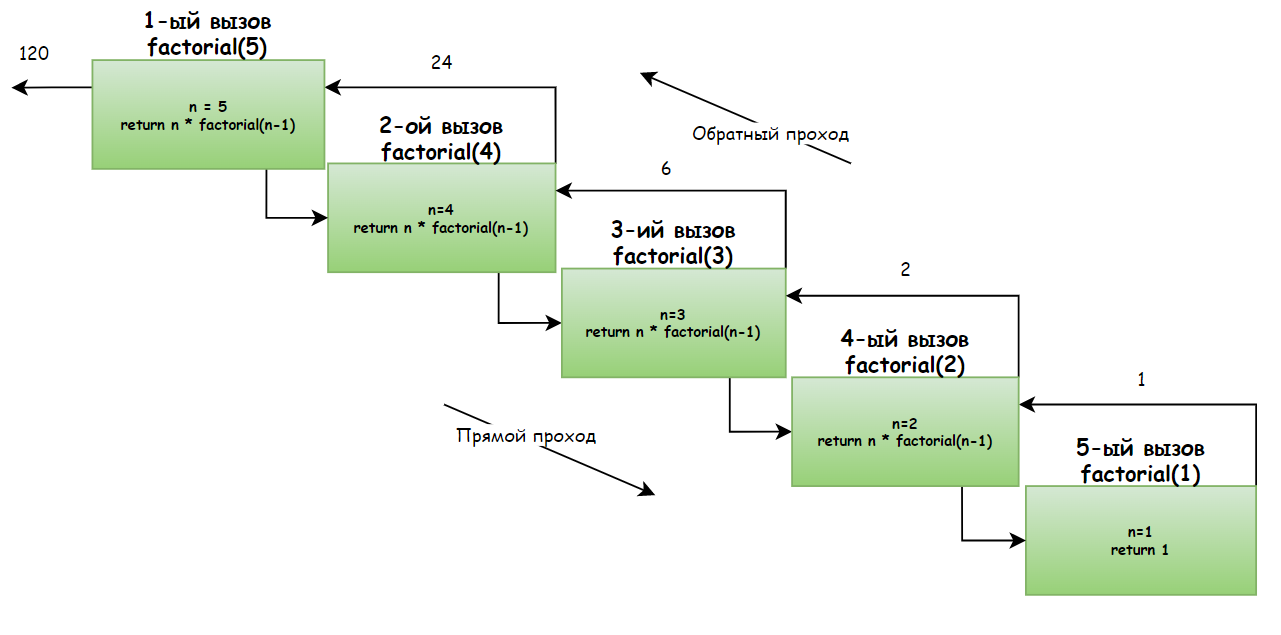

Поэтапная работа функции на примере factorial(5)

1.   Вызывается функция `factorial(5)`. Стэк вызова пополняется вызовом первой функции. Локальная переменная `n = 5`. Условие выхода из рекурсии не выполняется `(n != 1 и n!= 0)`, а значит выполняется основной блок функции. В этом блоке мы пытаемся вычислить выражение `n * factorial(n-1)`, что равносильно `5 * factorial(4)`. Так как результат работы функции `factorial(4)` заранее не известен, то для начала мы должны её выполнить.

2.   Вызывается функция `factorial(4)`. Стэк вызова пополняется вызовом второй функции. Локальная переменная `n = 4`. Условие выхода всё ещё не выполняется, а значит выполняется основной блок функции. Снова пытаемся вычислить выражение `n * factorial(n-1)`, что равносильно `4 * factorial(3)`. Но, чтобы получить результат, сначала должна выполниться функция `factorial(3)`.

3.   Вызывается функция `factorial(3)`. Теперь длина стэка вызова равна `3`. Всё повторяется вновь, только теперь `n = 3`. Вычисляем `n  * factorial(n-1) = 3 * factorial(2)`. Переходим к вызову функции `factorial(2)`.

4.   Вызываем функцию `factorial(2)`. Длина стэка вызова увеличивается до `4`. Для выполнения функции нам необходимо вычислить `n * factorial(n-1)= 2 * factorial(1)`. Мы всё ещё не получили конкретного ответа, поэтому переходим к вызову функции `factorial(1)`.

5.   Финал! Вызываем функцию `factorial(1)`. Длина стэка вызова становится равной `5`. В теле функции наконец выполняется условие остановки, так как `n==1`. Это значит, что `factorial(1)` возвращает конкретное значение `1`.

6.   А теперь обратное движение — освобождаем стэк вызова в противоположном его наполнению направлении. Последовательность завершения работы функций будет следующей:

   1.   На первом месте в стэке вызовов находится `factorial(1) = 1`. Функция отработала, поэтому стэк вызовов она покидает, его длина становится равной `4`.

   2.   Затем выполняется функция `factorial(2)`. Она должна вернуть `2 * factorial(1) = 2`. После её выполнения стэк вызова снова уменьшается, и количество ожидающих задач становится равным `3`.

   3.   Следующая на очереди — функция `factorial(3)`. Она возвращает значение выражения `3 * factorial(2) = 3 * 2 = 6`. После выполнения она покидает стэк. Длина стэка вызова составляет 2`.

   4.   Затем переходим к выполнению функции `factorial(4)`. Её возвращаемое значение — результат выражения `4 * factorial(3) = 4 * 6 = 24`. Функция отработала и покинула стэк. Его длина уменьшается до `1`.

   5.   Наконец, мы добрались до самой интересной для нас функции — `factorial(5)`. Она должна вернуть результат выражения `5 * factorial(4) = 5 * 24 = 120`. Процедура завершается, так как последняя функция покидает стэк вызова и вызывать больше нечего. Выполняются следующие строчки кода.

Именно по такому принципу работают все рекурсивные функции.

# ГЛУБИНА РЕКУРСИИ

Теперь поближе посмотрим на условия остановки, на две очень важные строки в коде нашей функции:

    # Задаём условия выхода из рекурсии:
    if n==0: return 1
    if n==1: return 1

Они задают условие, при выполнении которого функция возвращает конкретное значение, а не продолжает ссылаться на саму себя. 

Давайте удалим условие выхода:

In [ ]:
def wrong_factorial(n):
    return wrong_factorial(n-1)*n
wrong_factorial(5)
# Возникнет ошибка:
# RecursionError: maximum recursion depth exceeded

Эта ошибка переводится так: «Ошибка рекурсии: превышена максимальная глубина рекурсии». Это своего рода встроенная защита от бесконечной рекурсии в Python.


---

Мы знаем, что с рекурсией происходит наполнение стэка вызовов всё новыми и новыми вызовами рекурсивной функции. Очень тесно с этим явлением связан термин глубина рекурсии.

> Число единовременно ожидающих выполнения вызовов рекурсивной функции в стэке и называется глубиной рекурсии. Проще говоря, глубина рекурсии — это длина стэка вывода. 

Например, при расчёте факториала от 3 функция factorial будет вызвана три раза: для расчёта факториала от 3, 2 и 1 соответственно. В какой-то момент все три вызова окажутся в стэке вызовов, а глубина рекурсии составит 3. Схема наполнения и высвобождения стэка вызова для такого случая представлена ниже:

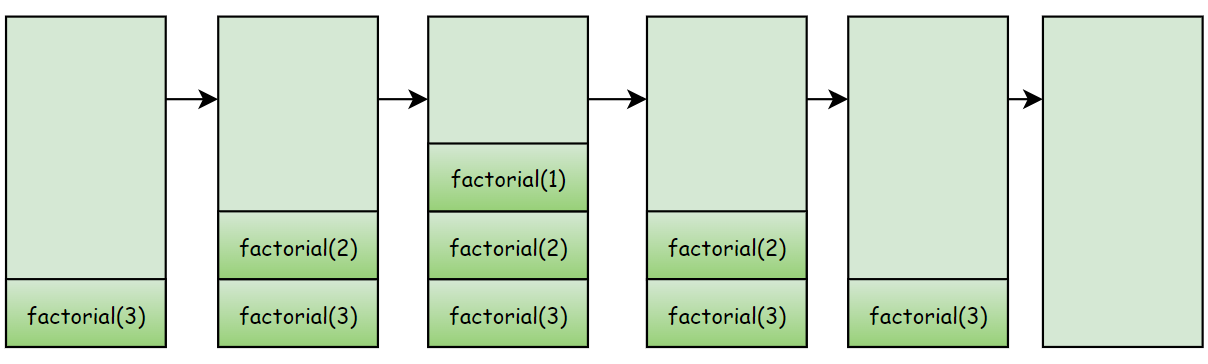

Когда глубина рекурсии оказывается слишком большой (превышает максимальный размер стэка функций), возникает ошибка `RecursionError`.

Кстати, обратите внимание, что в представленном выше объяснении также присутствует вложенность, характерная для стэка вызовов: мы столкнулись с ошибкой `RecursionError`, для объяснения которой потребовалось понятие глубины рекурсии, которое в свою очередь потребовало введения термина стэка вызовов функции. После обсуждения стэка вызовов мы вернулись к глубине рекурсии и, наконец, уточнили причину появления ошибки `RecursionError`! Вот он, пример рекурсивных размышлений.

> На самом деле ошибка `RecursionError` может возникнуть не только для рекурсивной функции, для которой забыли написать условие выхода из рекурсии. К сожалению, интерпретатор не может понять, есть ли условие выхода в коде функции, поэтому, когда в его стэке накопилось слишком много вызовов той же самой функции, он вернёт ошибку (это защита от бесконечного выполнения программы). Этот порог индивидуален и может зависеть от сложности самой функции, версии Python и других настроек.

На компьютере автора этого модуля факториал от 969 считается без проблем:

In [7]:
# Числа стали слишком большими, чтобы их печатать
# Будем печатать число цифр в результате
print(len(str(factorial(969))))

2475


А вот факториал от 970 уже вызывает ошибку:

In [ ]:
print(len(str(factorial(970))))
# Возникнет ошибка:
# RecursionError: maximum recursion depth exceeded in comparison

> На самом деле глубину рекурсии можно увеличить самостоятельно, если для решения вашей задачи крайне необходимо использовать рекурсию большей глубины. Вспомним первый пример — рекурсивный подсчёт суммы чисел в списке. Проблема состоит в том, что если бы длина списка была 1 000 элементов, то нам бы понадобилось 1 000 вызовов рекурсии, что, скорее всего, вызвало бы ошибку `RecursionError`. Тут-то нам и понадобится увеличение максимальной глубины рекурсии.

Давайте увеличим максимально допустимую глубину рекурсии, например до `1 000 000 000`. Для этого нам необходимо импортировать модуль `sys`, в котором содержатся функции для управления вашей системой. Оттуда нам понадобится функция `setrecursionlimit`, в аргументы которой нужно передать желаемую максимальную глубину рекурсии.

После нашей маленькой настройки снова попробуем посчитать факториал от 970.

In [6]:
# Импортируем модуль для работы с системными переменными
import sys
# Увеличим глубину рекурсии
sys.setrecursionlimit(1000000000)
print(len(str(factorial(970))))
# Будет напечатано:
# 2478

2478


Теперь факториал из 970 посчитался без проблем.

Вы научились создавать рекурсивные функции с условием выхода из рекурсии. В Data Science вы обязательно столкнётесь с ситуациями, когда применение рекурсии покажется вам наиболее простым методом для решения задачи. Тот же перебор вложенных папок, в которых у вас могут находиться файлы, создание последовательностей чисел (например, числа Фибоначчи, применяемые для  определения отрезков времени, через которое произойдёт то или иное событие, например изменение цены) или генерация распределений.

К тому же, рекурсии лежат в основе множества алгоритмов, в том числе алгоритмов машинного обучения.

> Однако рекурсии работают медленнее, чем аналогичные по сути циклы. К тому же существует ряд случаев, когда преобразование рекурсии в цикл затруднительно и неэффективно, например, реализация алгоритма дерева решений, быстрое преобразование Фурье или алгоритм quicksort. Однако, когда это оказывается возможным, цикл работает быстрее.

Продемонстрируем это с помощью функции time из модуля time. Она позволяет засечь время выполнения фрагмента кода (в нашем случае — вызова функции factorial).

Будем `100` раз считать факториал из `10 000`:

In [13]:
from time import time
import sys
sys.setrecursionlimit(1000000000)
 
def factorial(n):
    if n==0: return 1
    if n==1: return 1
    return factorial(n-1)*n
a = time()
for i in range(100):
    factorial(10000)
b = time()
print(b-a)
# Будет напечатано:
# 4.058465242385864

# а у меня 2.922797203063965 ))))

2.880557060241699


Чтобы 100 раз посчитать факториал от 10 000, потребовалось 4,06 секунды (при каждом вызове время может незначительно различаться).

А сколько времени потребуется для вычислений в цикле?

Напишем функцию factorial_for, которая считает факториал числа n в цикле:

In [ ]:
def factorial_for(n):
    # Для расчёта произведения первый член — единица, а не ноль!
    result = 1
    # Перемножаем числа от 1 до n
    for i in range(1, n+1):
        result *= i
    return result

Также посчитаем `100` раз факториал из `10 000`:

In [12]:
from time import time
# Объявляем функцию для расчёта факториала через цикл
def factorial_for(n):
    # Для расчёта произведения первый член — единица, а не ноль!
    result = 1
    # Перемножаем числа от 1 до n
    for i in range(1, n+1):
        result *= i
    return result
# Засекаем время до начала выполнения цикла
a = time()
for i in range(100):
    factorial_for(10000)
# Засекаем время после выполнения цикла
b = time()
# Считаем разницу: вычисляем время, потраченное на выполнение
print(b-a)
# Будет напечатано:
# 3.0138471126556396 
# а у меня 2.066563844680786 )))))

2.088324785232544


Потребовалось 3,01 секунды на расчёты, то есть почти на секунду (или почти на 25 %) меньше времени относительно рекурсии.

Кто-то скажет, что одна секунда — это очень мало и не имеет значения. В рамках нашей задачи так оно и есть. Однако рекурсивные функции могут быть намного объёмнее по вычислениям, чем наш факториал: например, рекурсивная функция может два и более раз вызывать в своём теле саму себя. Если рекурсивная функция является частью большой программы жизнеобеспечения, где она вызывается сотни или тысячи раз, то её задержка по сравнению с циклом может составить гораздо больший промежуток, чем одна секунда.

В этом юните вы узнали, что такое рекурсия, а также познакомились с важным объектом, который использует интерпретатор для выполнения вложенных задач — стэком вызовов функций — и освоили термин «глубина рекурсии».

Также вы научились:

*  создавать рекурсивные функции;
*  прописывать условие выхода из рекурсии;
*  увеличивать максимальную глубину рекурсии.

Чтобы научиться решать более сложные задачи с помощью рекурсий, необходимо научиться «мыслить рекурсивно», научиться разбивать задачу на типовые подзадачи. Для этого предлагаем вам познакомиться с [решениями простых типовых задач](https://pythonist.ru/primery-programm-s-ispolzovaniem-rekursii-na-yazyke-python/) на Python с использованием рекурсии. 

> Помните, что рекурсия обычно работает медленнее аналогичного цикла, поэтому по возможности пользуйтесь циклом!